# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [ ]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.JPG')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

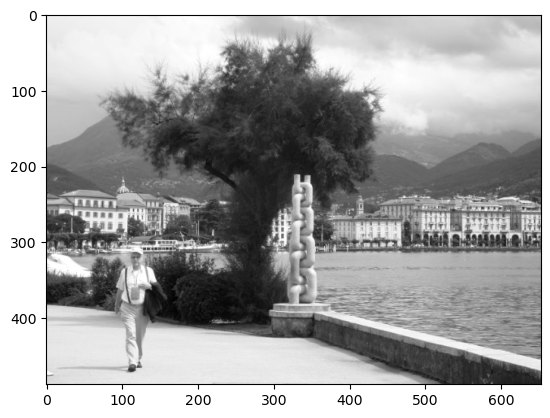

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [ ]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

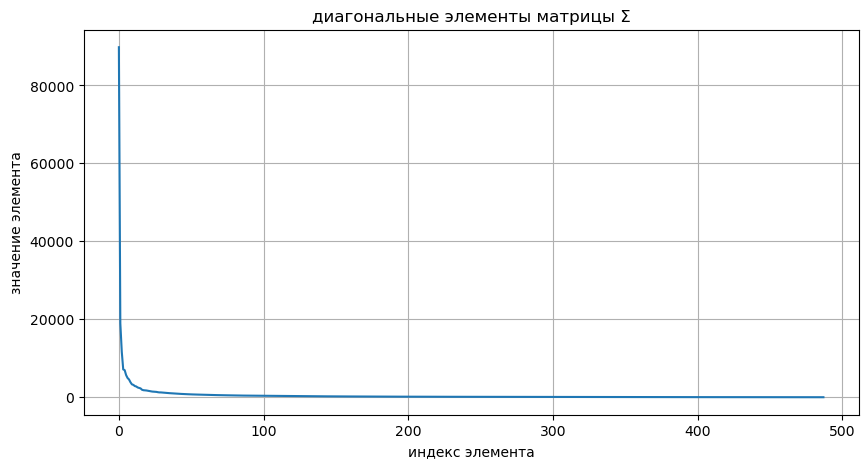

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(S)
plt.title("диагональные элементы матрицы Σ")
plt.xlabel("индекс элемента")
plt.ylabel("значение элемента")
plt.grid(True)
plt.show()

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

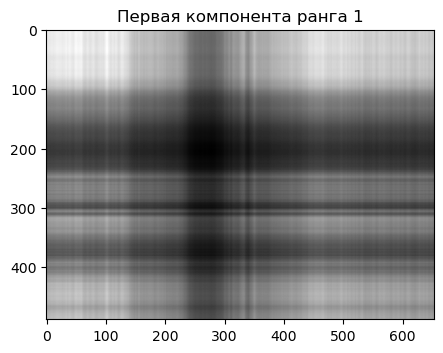

In [ ]:
s1 = S[0]
u1 = U[:, 0].reshape(-1, 1)
v1 = VT[0, :].reshape(1, -1) #свд нам вернул V транспонированную, поэтому просто берем из нее первую строку
comp1 = s1 * (u1 @ v1)
plt.figure(figsize=(5, 8))
plt.title("Первая компонента ранга 1")
plt.imshow(comp1, cmap="gray")
# plt.axis('off')
plt.show()

Поскольку в матрице $\Sigma$ все диагональные элементы упорядочены по убыванию, первая компонента содержит в себе максимальное сингулярное число. От этого мы ожидаем картинку, содержащую главную информацию об изображении: контур, яркость, тени, без мелких деталей и шумов. Поэтому получается достаточно "грубое" изображение. 

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

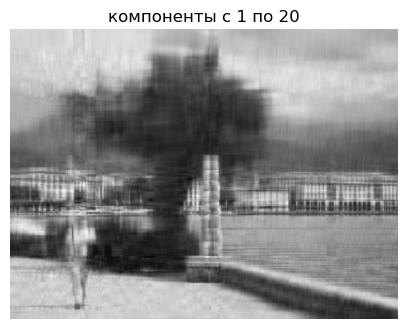

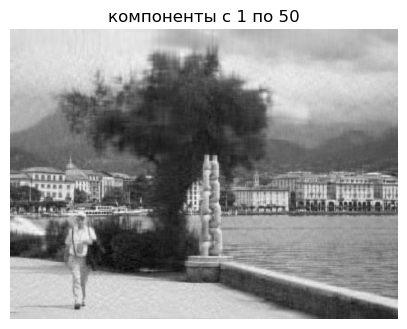

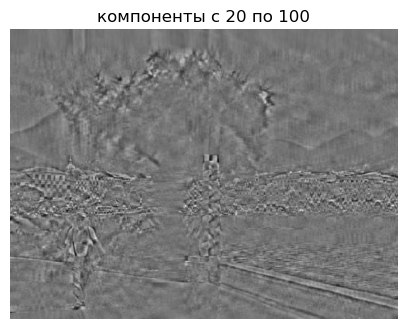

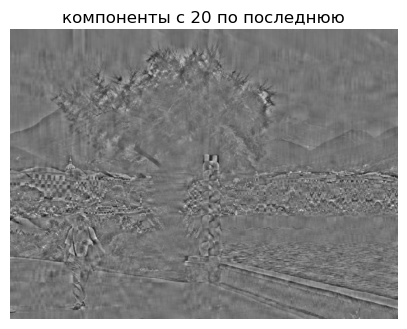

In [ ]:
def amount(U, S, VT, st, end):
    U_new = U[:, st:end]
    S_new = S[st:end]
    VT_new = VT[st:end, :]
    return (U_new * S_new.reshape(1, -1)) @ VT_new

res_1 = amount(U, S, VT, 0, 20)
plt.figure(figsize=(5, 8))
plt.title("компоненты с 1 по 20")
plt.imshow(res_1, cmap='gray')
plt.axis('off')
plt.show()

res_2 = amount(U, S, VT, 0, 50)
plt.figure(figsize=(5, 8))
plt.title("компоненты с 1 по 50")
plt.imshow(res_2, cmap='gray')
plt.axis('off')
plt.show()

res_3 = amount(U, S, VT, 19, 100)
plt.figure(figsize=(5, 8))
plt.title("компоненты с 20 по 100")
plt.imshow(res_3, cmap='gray')
plt.axis('off')
plt.show()

res_4 = amount(U, S, VT, 20, len(S))
plt.figure(figsize=(5, 8))
plt.title("компоненты с 20 по последнюю")
plt.imshow(res_4, cmap='gray')
plt.axis('off')
plt.show()

Как уже говорилось ранее, чем больше сингулярное значение, тем меньше деталей содержится в картинке, и она несет в себе главные черты изображения: формы, переходы яркости и так далее. Этим обусловлено изображение №1. С добавлением комопнент до 50-й мы можем видеть более детальное изображение. Следующие два изображения отражают спад сингулярных значений, которые служат для отражения рельефа изображения и его "текстуры". Заметим, что последние два изображения практически идентичны. Это говорит о том, что в какой-то момент числа становятся настолько малы, что их вклад в картинку практически отсутствует.

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

Идея решения состоит в том, чтобы найти такое r, начиная с которого сингулярные значения становятся близкими по величине, то есть каждая следующая компонента практически не улучшает приближение => норма Фробениуса перестает значительно изменяться. Таким образом, задача сводится к поиску оптимального ранга r в усечённом СВД.

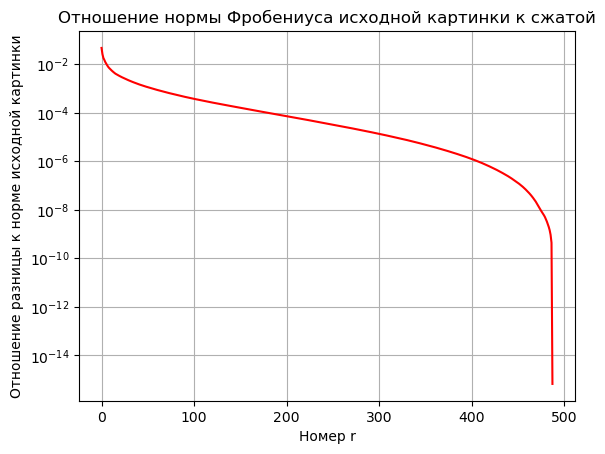

In [ ]:
# values = np.cumsum(S**2) / np.sum(S**2) #доля суммы квадратов сигм до i-й позиции к сумме квадратов всех
# r = np.argmax(values >= 0.999999) + 1
mx = np.max(S * U @ VT)
frob = 1 - np.sqrt(np.cumsum(S ** 2) / np.sum(S ** 2))
fig, ax = plt.subplots()
plt.plot(frob, color='red')
plt.yscale('log')
plt.grid(True)
plt.title("Отношение нормы Фробениуса исходной картинки к сжатой")
plt.xlabel('Номер r')
plt.ylabel('Отношение разницы к норме исходной картинки')
plt.show()

Таким образом, данный график показывает зависимость отличия норм исходной и сжатой матриц от количества взятых $\sigma$. Обратим внимание, что на первых $50\,\sigma$ наблюдается резкое уменьшение разницы между нормами, тогда как начиная с примерно $100$–$150\,\sigma$ этот процесс замедляется. Поэтому, чтобы с одной стороны заметно сжать изображение, а с другой — сохранить достаточное количество мелких деталей, оптимально выбирать около $80$–$100\,\sigma$. Возьмем $87$.

Лучший ранг матрицы А в усеченном СВД: 87


(-0.5, 652.5, 487.5, -0.5)

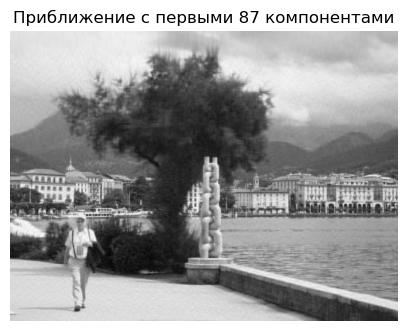

In [ ]:
r = 87
print(f"Лучший ранг матрицы А в усеченном СВД: {r}")
res = amount(U, S, VT, 0, r)
plt.figure(figsize=(5, 8))
plt.title(f"Приближение с первыми {r} компонентами")
plt.imshow(res, cmap='gray')
plt.axis('off')

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

У нас была матрица размера $m*n$, что равно количеству затрачиваемой ей памяти. В №4 мы нашли ее лучшее низкоранговое приближение, то есть матрицу А ранга r, минимально отличающающуюся от исходной по норме Фробениуса: $A_r = U_r \Sigma_r V_r^T$, где $U_r \in \mathbb{R}^{m \times r}$ ($m*r$ памяти), $\Sigma_r \in \mathbb{R}^{r \times r}$ (так как матрица диагональная, храним только $r$ чисел на ее диагонали) и $V_r^T \in \mathbb{R}^{r \times n}$ ($r*n$ памяти).
Таким образом, теоретически объём памяти уменьшается в
$\frac{mn}{r(m + n + 1)}$
раз.

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [ ]:
r = 87
m, n = img.shape
U_r = U[:, :r]
S_r = S[:r]
VT_r = VT[:r, :]
full_img = img.nbytes
ur = U_r.nbytes
sr = S_r.nbytes
VTr = VT_r.nbytes
total = ur + sr + VTr
prac_res = full_img / total
theor_res = (m * n) / (r*(m+n+1))
print(f"Реальный результат: {prac_res}")
print(f"Теоретический результат: {theor_res}")

Реальный результат: 3.2073595426454897
Теоретический результат: 3.2073595426454897


### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

1) Пусть $w = \alpha \cdot v$, где $|v|=1$ (так как $V$ - ортогональная матрица), тогда:
\begin{align*}
\mathrm{max}_w \frac{|Xw|}{|w|} = \mathrm{max}_{\alpha \ge 0, |v| = 1} \frac{|X \cdot \alpha v|}{|\alpha v|} =  \mathrm{max}_{\alpha \ge 0, |v| = 1} \frac{|\alpha|\cdot|Xv|}{|\alpha| \cdot|v|} = \mathrm{max}_{|v| = 1} \frac{|Xv|}{|v|} = \mathrm{max}_{|w| = 1} \frac{|Xw|}{|w|}
\end{align*}
2) Пусть $w = \sum\limits_{i=1}^{n} \alpha_i v_i$, где $v_1, \dots, v_n$ - ортонормированный базис из собственных векторов $X^TX$. Имеем:
\begin{align*}
\mathrm{max}_{|w|=1} |Xw| = \sqrt{\mathrm{max}_{|w|=1} (Xw)^TXw} = \sqrt{\mathrm{max}_{|w|=1} w^TX^TXw}
\end{align*}
Заметим, что
\begin{align*}
w^T X^T X w = \left(\sum\limits_{i=1}^{n} \alpha_i v_i \right)^T X^T X \left(\sum\limits_{i=1}^{n} \alpha_j v_i \right) = \sum\limits_{i=1}^{n} \sum\limits_{j=1}^{n} \alpha_i \alpha_j v_i^T X^T X v_j = \sum\limits_{i=1}^{n} \sum\limits_{j=1}^{n} \alpha_i \alpha_j \lambda_j v_i^T v_j
\end{align*}
Поскольку $\lambda_j = \sigma_j^2$ (собственные значения собственных векторов $v_j$) и $v_i^T v_j = \delta_{ij}$ (так как базис ортонормированный), то:
\begin{align*}
\sum\limits_{i=1}^{n} \sum\limits_{j=1}^{n} \alpha_i \alpha_j \lambda_j v_i^T v_j = \sum\limits_{i=1}^{n} \sum\limits_{j=1}^{n} \alpha_i \alpha_j \lambda_j \delta_{ij} = \sum\limits_{i=1}^{n} \alpha_i^2 \lambda_i\cdot 1 = \sum\limits_{i=1}^{n} \alpha_i^2 \sigma_i^2 = \sum\limits_{i=1}^{n} (\alpha_i \sigma_i)^2
\end{align*}
Тогда
\begin{align*}
\sqrt{\mathrm{max}_{|w|=1} w^TX^TXw} = \sqrt{\mathrm{max}_{|w|=1} \sum\limits_{i=1}^{n} (\alpha_i \sigma_i)^2} = \sqrt{\sigma_1^2} = \sigma_1 \text{(так как $\sigma_1$ - максимум среди $\sigma_i$)}
\end{align*}
3) $X = U\Sigma V^T, U = (u_1|\dots|u_k), V = (v_1|\dots|v_k), u = \alpha_1 u_1 + \dots + \alpha_k u_k, v = \beta_1 v_1 + \dots + \beta_k v_k$, тогда
\begin{align*}
\mathrm{max}_{|v|=|u|=1} |u^TXv|
&=  \mathrm{max}_{|v|=|u|=1} |u^T U \Sigma V^T v|=\\
&= \mathrm{max}_{|v|=|u|=1} |(U^T u)^T \Sigma (V^T v)|=\\
&= \mathrm{max}_{|v|=|u|=1} |(\alpha_1 U^T u_1 + \dots + \alpha_k U^T u_k)^T \Sigma (\beta_1 V^T v_1 + \dots + \beta_k V^T v_k)|=\\
&= \mathrm{max}_{|v|=|u|=1} |(\alpha_1 \dots \alpha_k) \Sigma (\beta_1 \dots \beta_k)^T|=\\
&= \mathrm{max}_{|v|=|u|=1} |\alpha_1 \beta_1 \sigma_1 + \dots + \alpha_k \beta_k \sigma_k| \quad
\text{(предпоследний переход происходит в силу того, что ${u_i}$ и ${v_i}$ ортонормированы).}
\end{align*} 
Воспользуемся неравенством Коши-Буняковского:
\begin{align*}
|\alpha_1 \beta_1 \sigma_1 + \dots + \alpha_k \beta_k \sigma_k| \le \sigma_1 \cdot |\alpha_1 \beta_1 + \dots + \alpha_k \beta_k| = \sigma_1 \cdot|\langle \alpha, \beta \rangle| \le \sigma_1 \cdot |\alpha| \cdot |\beta| = \sigma_1 \cdot 1 \cdot 1 = \sigma_1. \quad
\text{Равенство в данном случае достигается, так как } |\alpha| = |\beta| = 1.
\end{align*}
Получим $\mathrm{max}_{|v|=|u|=1} |\alpha_1 \beta_1 \sigma_1 + \dots + \alpha_k \beta_k \sigma_k| = \sigma_1$.


**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$.

Пусть
$b = \begin{pmatrix} \sin 0 \\ \sin 1 \\ \vdots \\ \sin(n-1) \end{pmatrix},\quad
c = \begin{pmatrix} \cos 0 \\ \cos 1 \\ \vdots \\ \cos(n-1) \end{pmatrix}.$
$\quad Тогда \quad A = b\,c^T\quad и\quad \mathrm{rk} A = 1.$

Построим компактное сингулярное разложение.
$$
\|b\| = \sqrt{\sum_{k=0}^{n-1} \sin^2 k}, \quad
\|c\| = \sqrt{\sum_{k=0}^{n-1} \cos^2 k}.
$$
Обозначим:
$$
u = \frac{b}{\|b\|},\quad v = \frac{c}{\|c\|}.
$$
Тогда разложение принимает вид:
$$
A = u\,\sigma_1\,v^T,
$$
где $\sigma_1$ - единственное сингулярное значение:
$$
\sigma_1 = \|a\| \cdot \|b\| = \sqrt{\left(\sum\limits_{k=0}^{n-1} \sin^2 k \right)\left(\sum\limits_{k=0}^{n-1} \cos^2 k \right)}
$$




**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

Рассмотрим вектор $x \in \mathbb{R}^n$: 
$$
x = \sum\limits_{i=1}^{n} \alpha_i v_i = V \alpha,\quad \text{где } \alpha \in \mathbb{R}^n\text{ и столбцы } V \text{ образуют ортонормированный базис.}
$$
Тогда:
\begin{align*}
Ax &= U \Sigma V^T x = U \Sigma V^T V \alpha = U \Sigma \alpha \\
&= U \begin{pmatrix}
\alpha_1 \sigma_1 \\
\vdots \\
\alpha_r \sigma_r \\
0 \\
\vdots \\
0
\end{pmatrix}
= \sum_{i=1}^r \alpha_i \sigma_i u_i.
\end{align*}



Тогда, образ оператора $\mathcal{A}$ — это линейная оболочка векторов $u_1, \dots, u_r$:
$$
\mathrm{Im}\,\mathcal{A} = \langle u_1, \dots, u_r \rangle.
$$

Пусть теперь $Ax = 0$. Тогда
$$
U \Sigma \alpha = 0 \quad \Rightarrow \quad \Sigma \alpha = 0, \text{ так как столбцы } U \text{ ортонормированные}.
$$

Последнее равенство возможно $\Leftrightarrow \sigma_1\alpha_1 = \dots = \sigma_r\alpha_r = 0 \Leftrightarrow \alpha_1 = \dots = \alpha_r = 0$, а остальные компоненты произвольны (поскольку $\sigma_i > 0$ для $ 1 \le i \le r$). То есть $\alpha \in \langle e_{r+1}, \dots, e_n \rangle, \text{ а так как } x = \sum\limits_{i=1}^{n} \alpha_i v_i, \text{ то } \mathrm{Ker}\,\mathcal{A} = \langle v_{r+1}, \dots, v_n \rangle.$

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

Рассмотрим
$$
P^2 = A(A^T A)^{-1}A^T A(A^T A)^{-1}A^T = A(A^T A)^{-1}A^T = P \quad и \quad P^T = P.
$$
Значит $P$ — проектор ранга $n$ (так как $\mathrm{rk}P = \mathrm{dim}P = \mathrm{dim}A = n$) на $\mathrm{Im}\,{A}$, то есть на линейную оболочку столбцов матрицы $A$.


Поскольку $P$ симметричен и $P^2=P$, то существует ортономированный базис из собственных векторов и его собственные значения $\lambda$ удовлетворяют $\lambda^2=\lambda$.  
Тогда $\lambda\in\{0,1\}$, причём в SVD $P=U\Sigma V^T$ сингулярные числа есть $|\lambda|$, где $\lambda$ — собственные значения $P$.  
Поэтому

$$
\Sigma = 
\begin{pmatrix}
1      &        &        &        &        \\
       & \ddots &        &        &        \\
       &        & 1      &        &        \\
       &        &        & 0      &        \\
       &        &        &        & \ddots \\
\end{pmatrix}
$$

где первые $n$ диагональных элементов равны $1$, а остальные $m-n$ равны $0$.

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


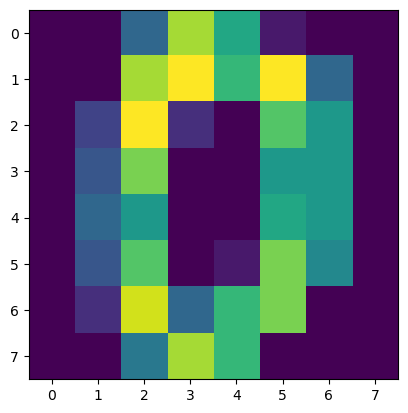

In [ ]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [ ]:
U, S, VT = svd(digits.data, full_matrices=False)
x = digits.data
y = digits.target

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

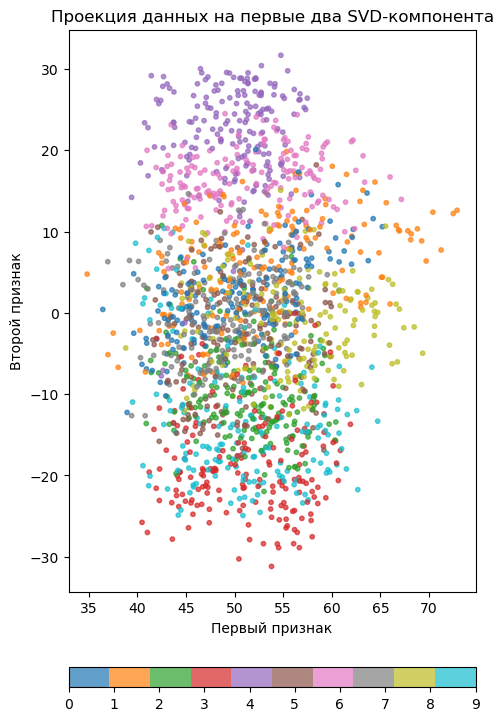

In [ ]:
P = U[:, :2] @ np.diag(S[:2])

plt.figure(figsize=(5, 8))
scatter = plt.scatter(
    P[:, 0], P[:, 1],
    c=y, cmap='tab10', s=10, alpha=0.7
)
cbar = plt.colorbar(
    scatter,
    orientation='horizontal',
    pad=0.1,
    ticks=np.arange(0, 10, 1)
)
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.title('Проекция данных на первые два SVD-компонента')
plt.tight_layout()
plt.show()

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

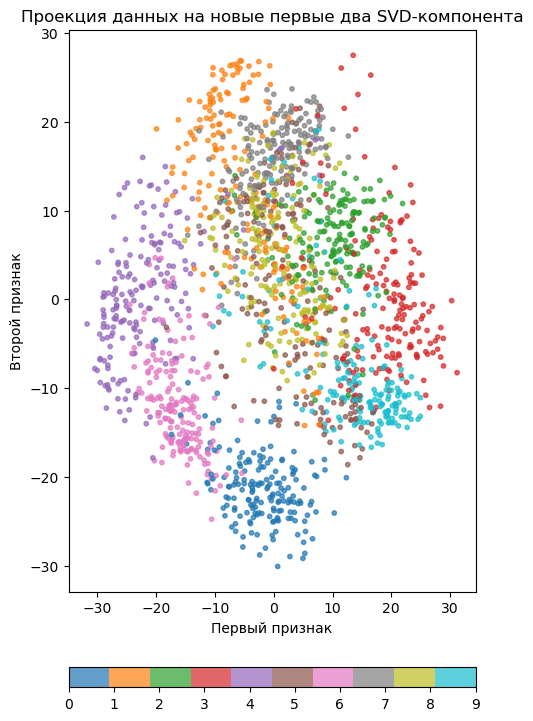

In [ ]:
U_new, S_new, VT_new = svd(x - x.mean(axis=0), full_matrices=False)
P_new = U_new[:, :2] @ np.diag(S_new[:2])
plt.figure(figsize=(5, 8))
scatter = plt.scatter(
    P_new[:, 0], P_new[:, 1],
    c=y, cmap='tab10', s=10, alpha=0.7
)
cbar = plt.colorbar(
    scatter,
    orientation='horizontal',
    pad=0.1,
    ticks=np.arange(0, 10, 1)
)
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.title('Проекция данных на новые первые два SVD-компонента')
plt.tight_layout()
plt.show()

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

В первом случае первая компонента захватывает смещение всего набора данных, и множество точек сильно уходит в одну сторону от начала координат. Во втором случае данные симметричны относительно начала координат, и первая компонента отражает направление наибольшей дисперсии. График становится нагляднее, что дает понять, какие цифры близки друг к другу по своим главным компонентам.
Таким образом, вычитание среднего перед SVD устраняет смещение и делает визуализацию более информативной и читабельной, поскольку акцент смещается на реальные вариации внутри данных, а не на их общее положение.

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

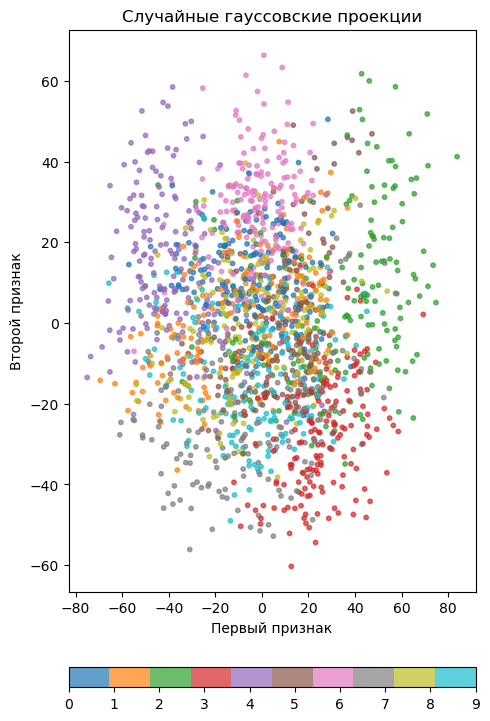

In [ ]:
from sklearn.random_projection import GaussianRandomProjection

X = x - x.mean(axis=0)
grp = GaussianRandomProjection(n_components=2, random_state=42)
X_grp = grp.fit_transform(X)

plt.figure(figsize=(5, 8))
scatter = plt.scatter(
    X_grp[:, 0], X_grp[:, 1],
    c=y, cmap='tab10', s=10, alpha=0.7
)
cbar = plt.colorbar(
    scatter,
    orientation='horizontal',
    pad=0.1,
    ticks=np.arange(0, 10, 1)
)
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.title('Случайные гауссовские проекции')
plt.tight_layout()
plt.show()

Посмотрим на полученные графики:
1) Случайные гауссовские проекции
Точки смешаны: кластеры цифр накладываются друг на друга, нет никаких очевидных границ между разными цифрами, проекция не учитывает структуру данных, просто равномерно разбивает пространство.
2) Проекция на первые 2 SVD-компоненты
Чётко прослеживаются группы точек одного цвета: каждая цифра сосредоточена в своей области, кластеры расположены симметрично относительно начала координат.

Таким образом, мы можем сделать вывод, что метод случайных гауссовских проекций не запоминает геометрию данных, поэтому они перемешиваются, что приводит к затруднению их исследования.

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$:

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [ ]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

/var/folders/_q/fb_wwq8d3klb63t8mx3t0h8h0000gn/T/ipykernel_66095/503124060.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
/var/folders/_q/fb_wwq8d3klb63t8mx3t0h8h0000gn/T/ipykernel_66095/503124060.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

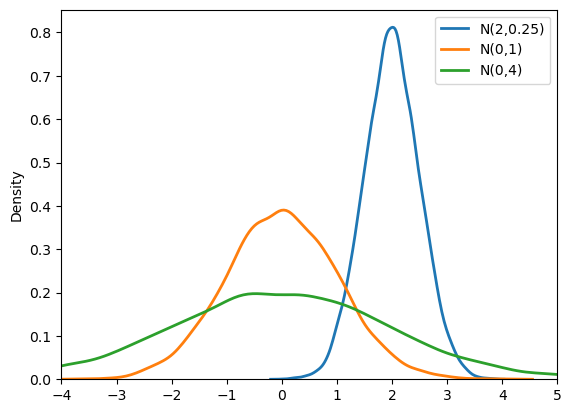

In [ ]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат.
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

<Axes: >

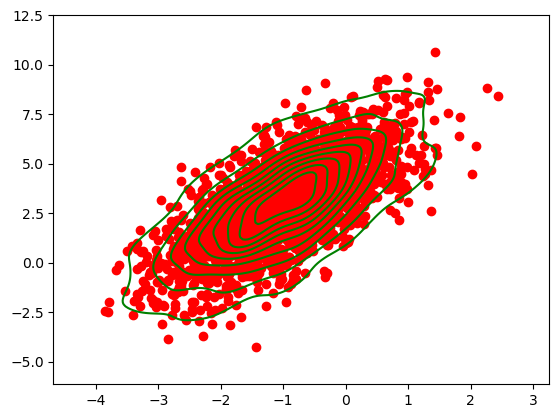

In [ ]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(x=s[:, 0], y=s[:, 1], fill=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [ ]:
N = 1000
X = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,-2],[-2,5]]), size=N)

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

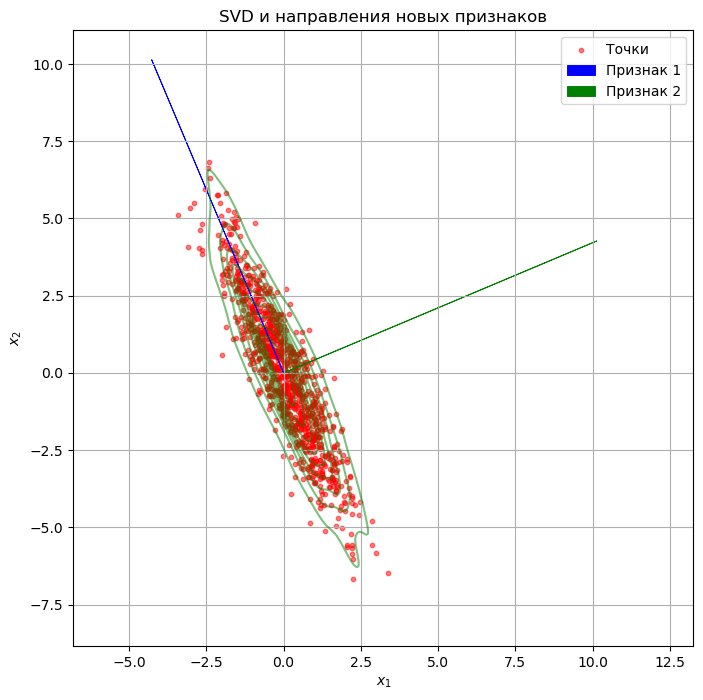

In [ ]:
U, S, VT = svd(X, full_matrices=False)
# Xc = X - X.mean(axis=0)
# U, S, VT = np.linalg.svd(Xc, full_matrices=False)
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], color='red', s=10, alpha=0.5, label='Точки')
sns.kdeplot(x=X[:, 0], y=X[:, 1], fill=False, color='g', alpha=0.5)

colors = ['blue', 'green']
labels = ['Признак 1', 'Признак 2']
k = 11
for i in range(2):
    vec = VT[i, :] * k
    plt.arrow(0, 0, vec[0], vec[1], color=colors[i], linewidth=0.67, label=labels[i])

plt.axis('equal')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('SVD и направления новых признаков')
plt.legend()
plt.grid(True)
plt.show()

**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$
Найдем характеристический многочлен $\Sigma$:
$$
\chi_{\Sigma}(t) = \begin{vmatrix} t-1 & 2\\ 2 & t-5 \end{vmatrix} = t^2 - 6t + 1
$$
$t^2 - 6t + 1 = 0 => \lambda_1 = 3+2\sqrt{2}, \lambda_2 = 3-2\sqrt{2}$.

1) $(\Sigma - \lambda_1 E)v = 0$:
$$
\begin{pmatrix} -2-2\sqrt{2} & -2 \\ -2 & 2-2\sqrt{2} \end{pmatrix}  \rightarrow  \text{УСВ: } \begin{pmatrix} 1 & -1+\sqrt{2} \\ 0 & 0 \end{pmatrix}
$$
ФСР: $v_1 = \begin{pmatrix} 1-\sqrt{2} \\ 1 \end{pmatrix}$

2) $(A - \lambda_2 E)v = 0$:
$$
\begin{pmatrix} -2+2\sqrt{2} & -2 \\ -2 & 2+2\sqrt{2} \end{pmatrix} \rightarrow  \text{УСВ: } \begin{pmatrix} 1 & -1-\sqrt{2} \\ 0 & 0 \end{pmatrix}
$$
ФСР: $v_2 = \begin{pmatrix} 1+\sqrt{2} \\ 1 \end{pmatrix}$

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

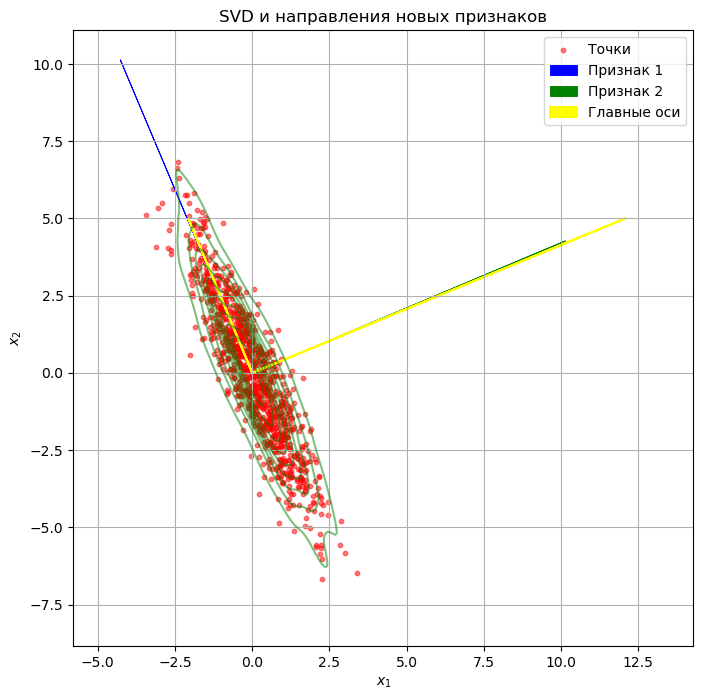

In [ ]:
U, S, VT = svd(X, full_matrices=False)
# Xc = X - X.mean(axis=0)
# U, S, VT = np.linalg.svd(Xc, full_matrices=False)
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], color='red', s=10, alpha=0.5, label='Точки')

colors = ['blue', 'green']
labels = ['Признак 1', 'Признак 2']
k = 11
for i in range(2):
    vec = VT[i, :] * k
    plt.arrow(0, 0, vec[0], vec[1], color=colors[i], linewidth=0.67, label=labels[i])
k2 = 5
plt.arrow(0, 0, k2 * (1-2**0.5), k2 * 1, color='yellow', linewidth=1.5, label="Главные оси")
plt.arrow(0, 0, k2 * (1+2**0.5), k2 * 1, color='yellow', linewidth=1.5)
sns.kdeplot(x=X[:, 0], y=X[:, 1], fill=False, color='g', alpha=0.5)
plt.axis('equal')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('SVD и направления новых признаков')
plt.legend()
plt.grid(True)
plt.show()

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже.

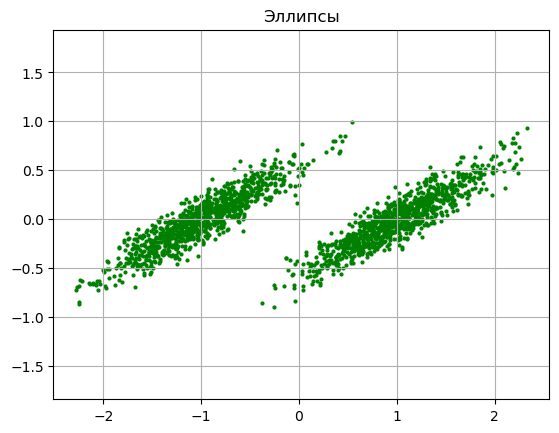

In [ ]:
#построим произвольную матрицу ковариации:
x = 0.3
y = 0.01
N = 2000
theta = np.deg2rad(30)
R = np.array([
    [ np.cos(theta), -np.sin(theta)],
    [ np.sin(theta),  np.cos(theta)]
])
cov_new = R @ np.diag([x, y]) @ R.T
X = np.vstack([
    np.random.multivariate_normal((-1, 0), cov_new, N//2),
    np.random.multivariate_normal((1, 0), cov_new, N//2)
])
plt.title("Эллипсы")
plt.scatter(X[:,0], X[:,1], color='green', s=4)
plt.axis('equal')
plt.grid(True)
plt.show()

**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

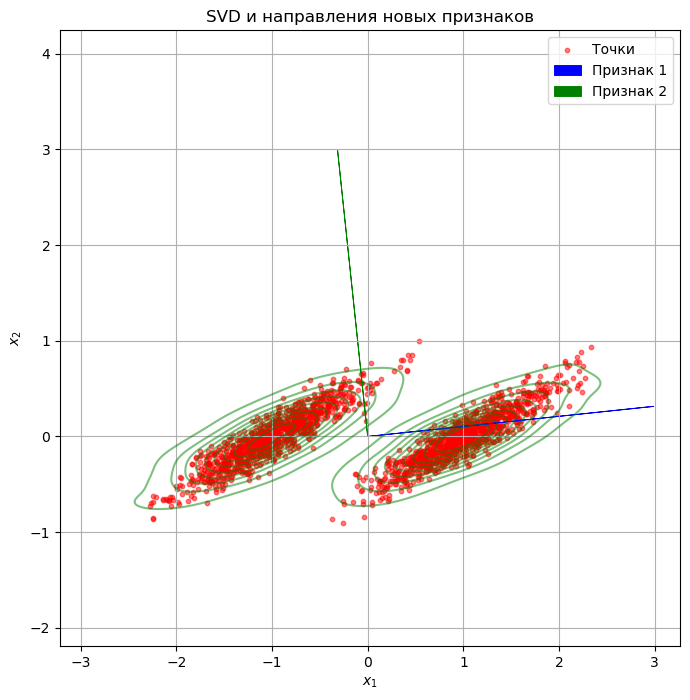

In [ ]:
U, S, VT = svd(X - X.mean(axis=0), full_matrices=False)
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], color='red', s=10, alpha=0.5, label='Точки')
sns.kdeplot(x=X[:, 0], y=X[:, 1], fill=False, color='g', alpha=0.5)

colors = ['blue', 'green']
labels = ['Признак 1', 'Признак 2']
k = 3
for i in range(2):
    vec = VT[i, :] * k
    plt.arrow(0, 0, vec[0], vec[1], color=colors[i], linewidth=0.67, label=labels[i])

plt.axis('equal')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('SVD и направления новых признаков')
plt.legend()
plt.grid(True)
plt.show()


Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \text{если объект $x$ из первого класса}$$
$$f(x) > c,\ \text{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

Ни один из компонент SVD по отдельности не позволяет однозначно разделить два эллипса. Одни и те же значения первой компоненты встречаются в обоих кластерах, то же самое справедливо и для второй. В лучшем случае можно поставить ограничения (как в примере выше) и показать, при каких значениях точка точно из первого эллипса, а при каких — из второго, но для значений между ними кластер неизвестен, что не решает задачу кластеризации. 
Чтобы разделить левые и правые точки, нужен признак, сонаправленный с вектором, соединяющим центры кластеров (то есть с осью x в нашем примере). Теоретически можно взять некоторую линейную комбинацию $w_1\,c_1 + w_2\,c_2$ ($c_i$ - главные компоненты), подобрать веса так, чтобы получить разделяющую функцию, но это сводит на нет смысл SVD, так как мы рассчитывали, что «главные компоненты» найдут информативное направление.


**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

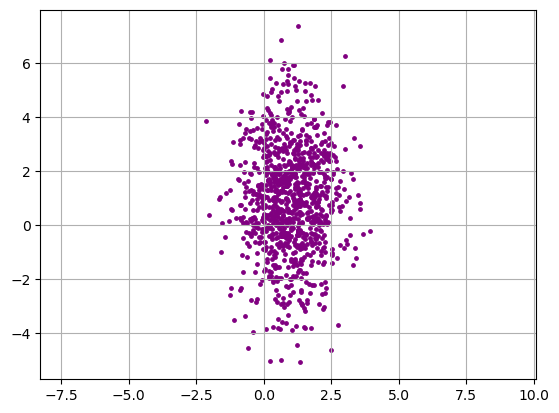

In [ ]:
N = 1000
mat = [[1, 0], [0, 4]]
X = np.random.multivariate_normal((1, 1), mat, N)
plt.scatter(X[:,0], X[:,1], color='purple', s=6)
plt.grid(True)
plt.axis('equal')
plt.show()

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

Диагональная ковариационная матрица означает отсутствие корреляции между признаками, то есть распределение независимое по осям координат. Соответственно, «интересные» направления признаков совпадают с осями $x_1$ и $x_2$, а собственные векторы $\,v_1=(1,0)^T$ и $v_2=(0,1)^T$ задают именно эти направления. Более того, собственные значения $\lambda_1$ и $\lambda_2$ показывают величину дисперсии вдоль каждой из этих осей.

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

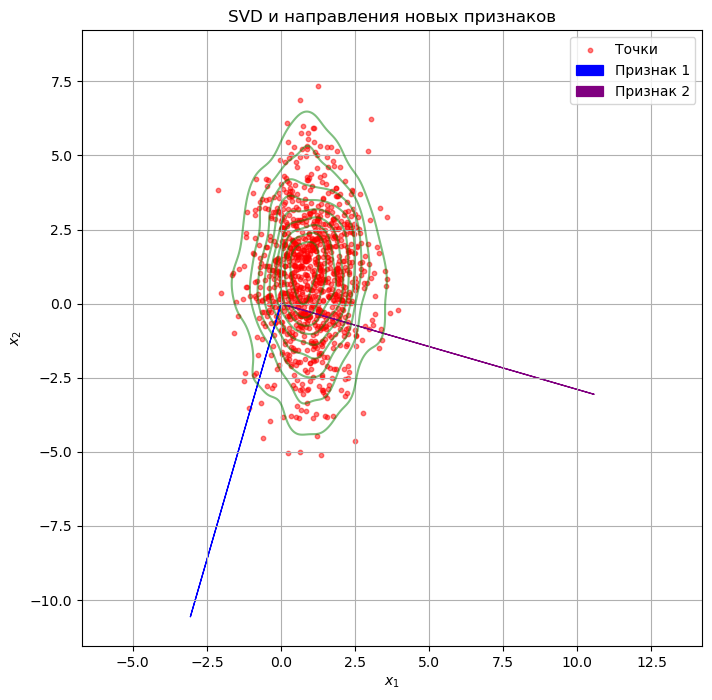

In [ ]:
U, S, VT = svd(X, full_matrices=False)
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], color='red', s=10, alpha=0.5, label='Точки')
sns.kdeplot(x=X[:, 0], y=X[:, 1], fill=False, color='g', alpha=0.5)

colors = ['blue', 'purple']
labels = ['Признак 1', 'Признак 2']
k = 11
for i in range(2):
    vec = VT[i, :] * k
    plt.arrow(0, 0, vec[0], vec[1], color=colors[i], linewidth=0.9, label=labels[i])

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.title('SVD и направления новых признаков')
plt.legend()
plt.grid(True)
plt.show()

**10. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

Весь анализ и визуализация смещаются из-за того, что начало координат не совпадает с центром облака точек. Решение - центрировать данные. 

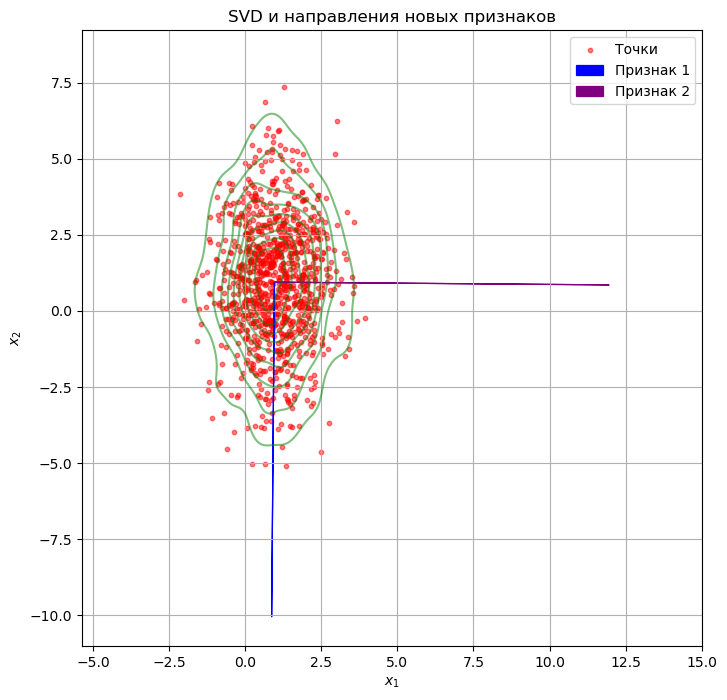

In [ ]:
XM = X.mean(axis=0)
U, S, VT = svd(X-X.mean(axis=0), full_matrices=False)
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], color='red', s=10, alpha=0.5, label='Точки')
sns.kdeplot(x=X[:, 0], y=X[:, 1], fill=False, color='g', alpha=0.5)

colors = ['blue', 'purple']
labels = ['Признак 1', 'Признак 2']
k = 11
for i in range(2):
    vec = VT[i, :] * k
    plt.arrow(XM[0], XM[1], vec[0], vec[1], color=colors[i], linewidth=0.9, label=labels[i])

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.title('SVD и направления новых признаков')
plt.legend()
plt.grid(True)
plt.show()